<h3>Team Sigmoid </h3>

<h3> Decision Trees</h3>
In the last assignment we had tried to find a correlation between the impact of web/mob app and the length of membership.

In this assignment we have enriched our data and tried to find if an advertisement is served to the user, is he/she likely to buy a product.

In [209]:
###Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<h3>Fetch the dataset </h3>

In [210]:
##Fetch the dataset
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


Manipulating Gender to an integer value

In [211]:
df['Gender'] = (df['Gender'] !='Male').astype(int)

In [212]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


<h3>Generating the pairplots</h3>

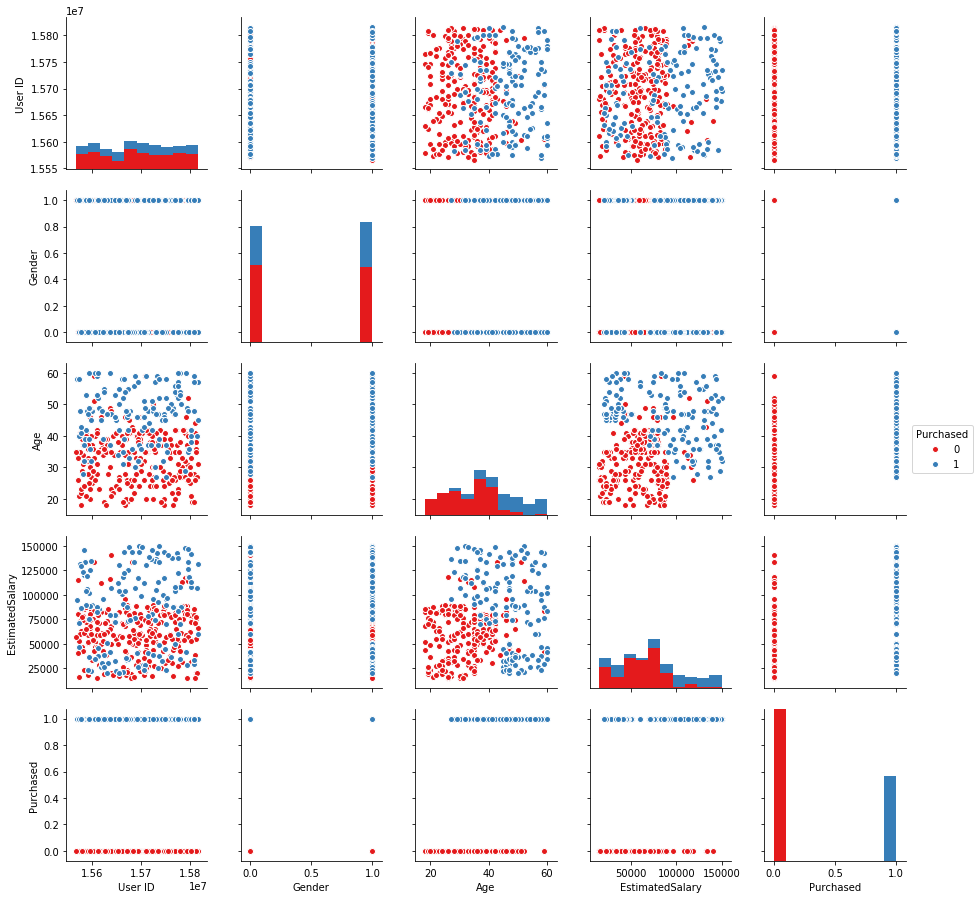

In [213]:
sns.pairplot(df,hue='Purchased',palette='Set1')

<h3>Train Test Split</h3>
Let's split up the data into a training set and a test set!

In [214]:
from sklearn.model_selection import train_test_split

In [215]:
X = df.iloc[:, [1,2, 3]].values
y = df.iloc[:, 4].values

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state = 0)

<h3>Decision Trees</h3>
We will define the decision tree

In [217]:
from sklearn.tree import DecisionTreeClassifier

In [218]:
dtree = DecisionTreeClassifier(criterion='entropy')

In [219]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

<h3>Prediction and Evaluation</h3>

In [220]:
predictions = dtree.predict(X_test)

In [221]:
from sklearn.metrics import classification_report,confusion_matrix

In [222]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.96      0.90      0.93        79
          1       0.83      0.93      0.87        41

avg / total       0.91      0.91      0.91       120



In [223]:
print(confusion_matrix(y_test,predictions))

[[71  8]
 [ 3 38]]


<h3>Tree Visualization</h3>

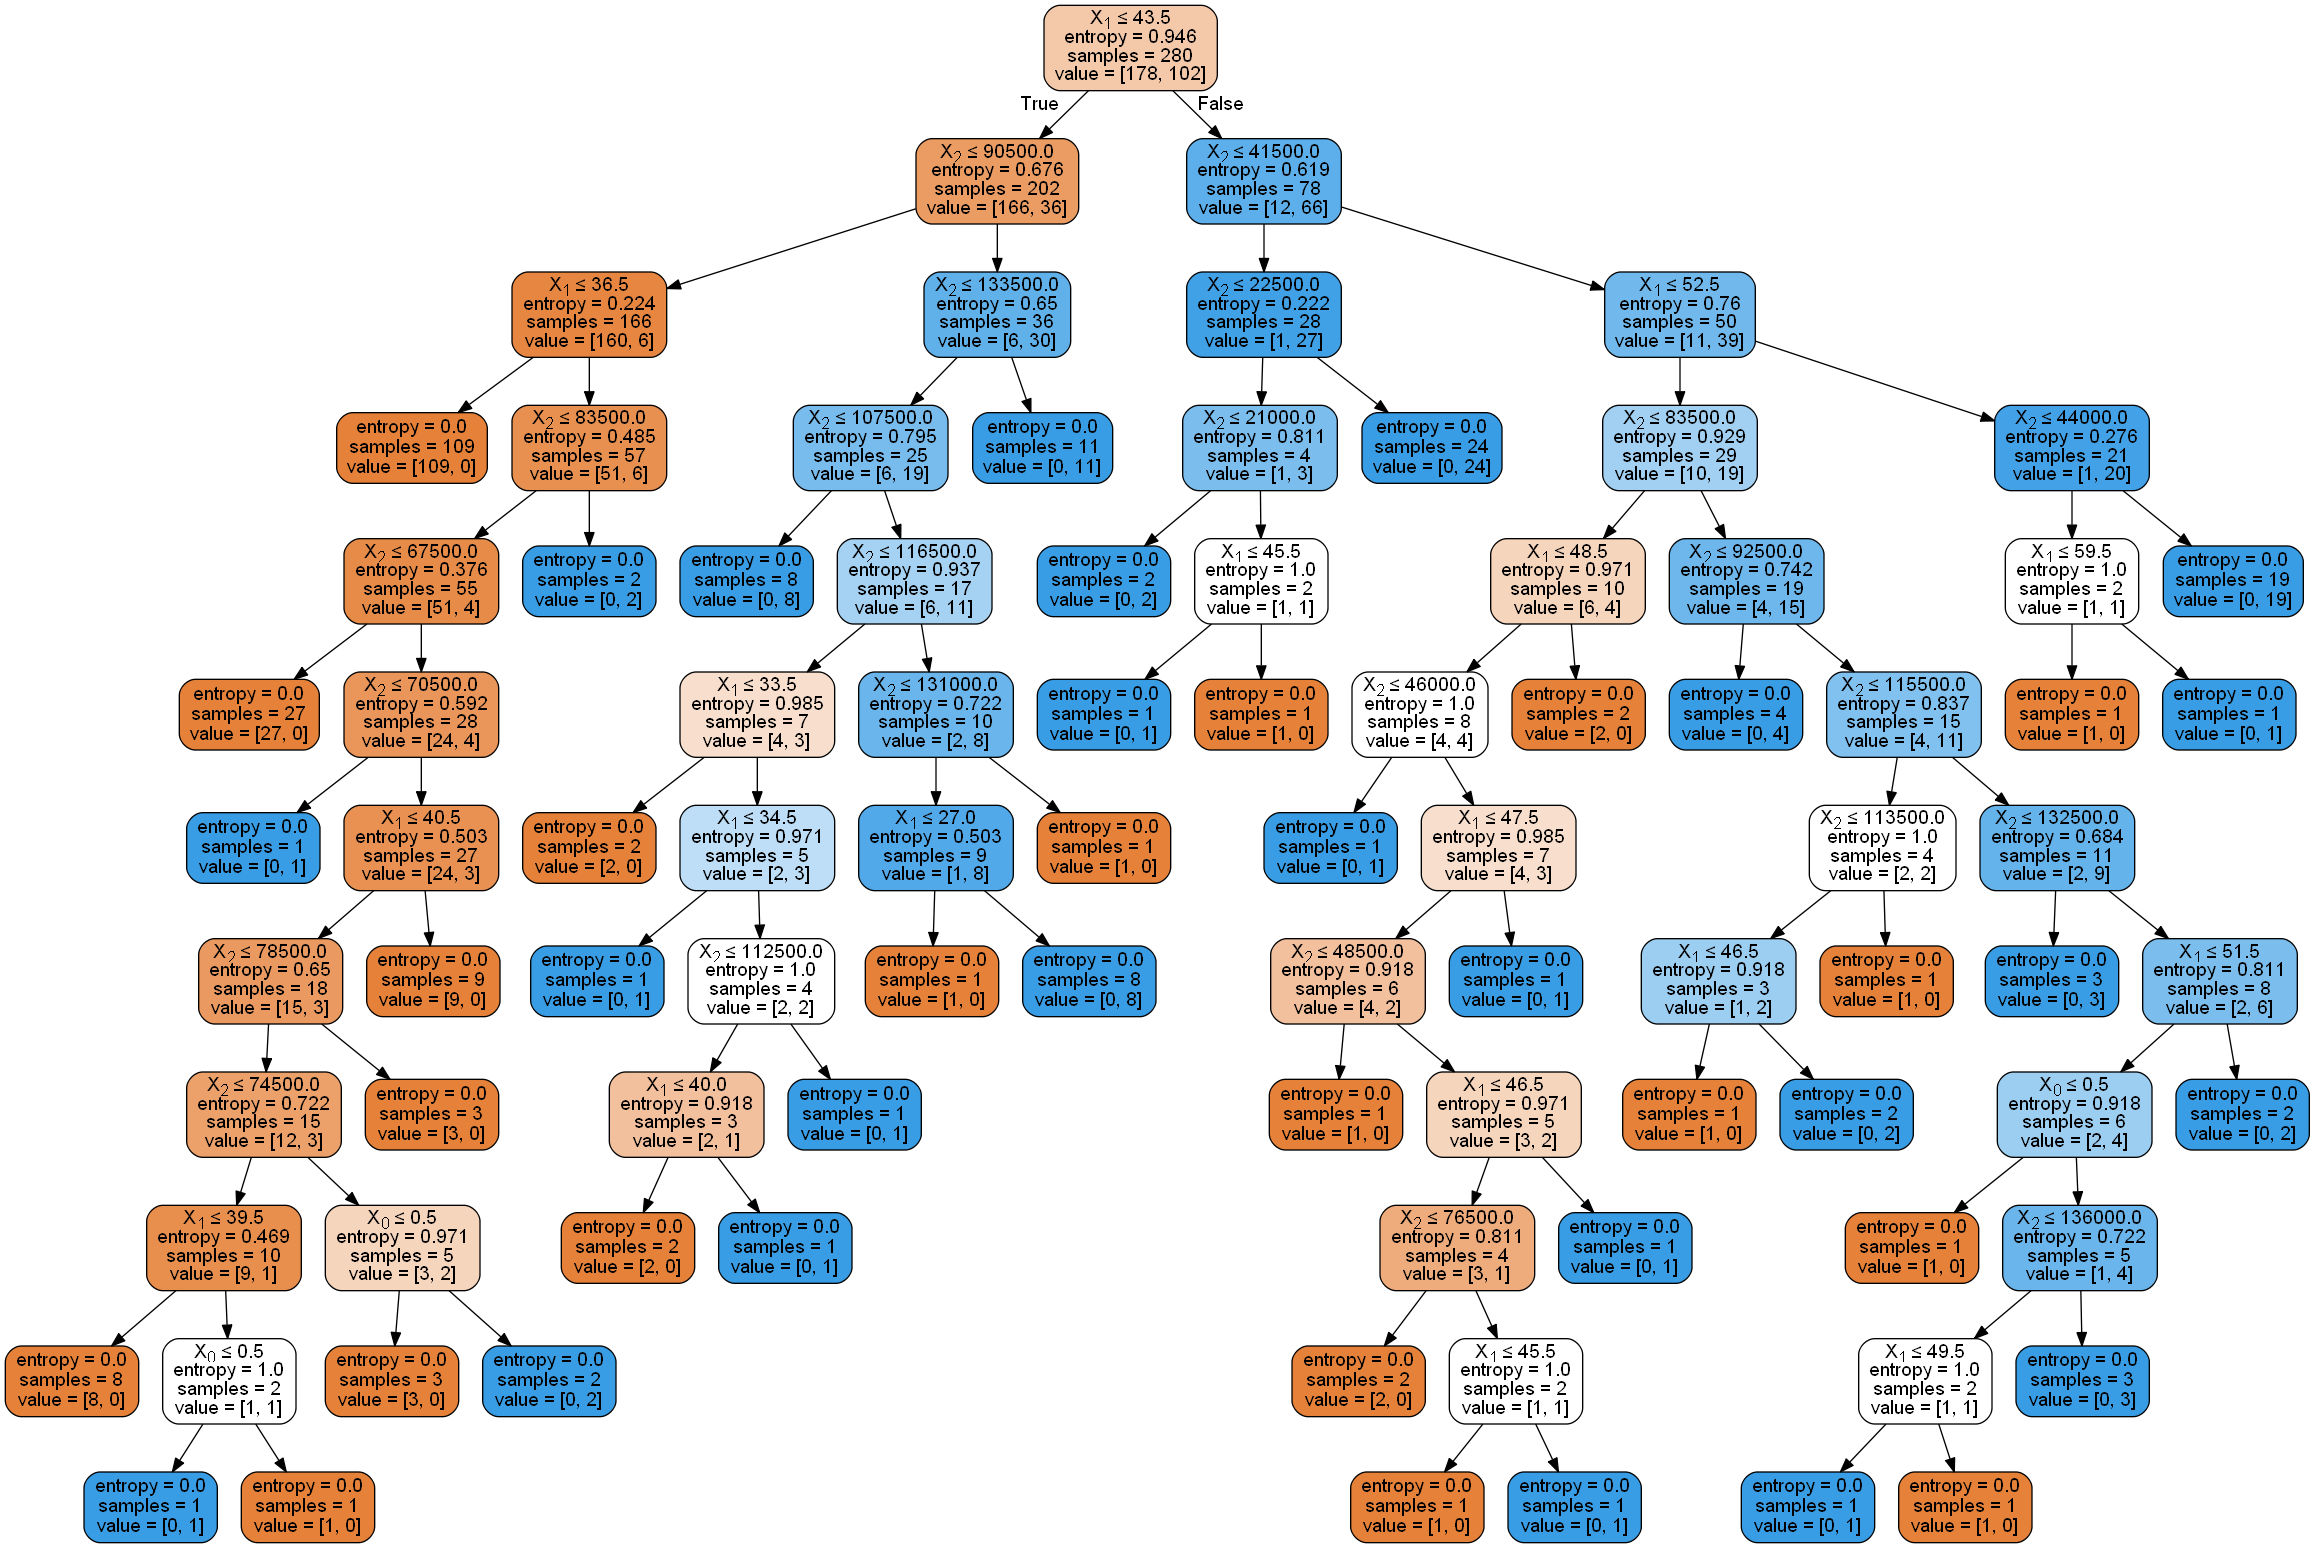

In [224]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

<h3>Random Forests</h3>
In the following sections, we will generate the Random Forest model and compare with the decision tree

In [225]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [226]:
rfc_pred = rfc.predict(X_test)

In [227]:
print(confusion_matrix(y_test,rfc_pred))

[[72  7]
 [ 5 36]]


In [228]:
print(classification_report(y_test,rfc_pred))

             precision    recall  f1-score   support

          0       0.94      0.91      0.92        79
          1       0.84      0.88      0.86        41

avg / total       0.90      0.90      0.90       120



<h4>If we compare both the models, random forest works slightly better than the decision tree.</h4>